1. Let's clear the text from stop words

In [ ]:
from pathlib import Path
from textblob import TextBlob


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
! touch "/content/gdrive/My Drive/Propp/Proppfunc.txt"

In [ ]:
blob = TextBlob(Path('/content/gdrive/My Drive/Propp/Proppfunc.txt').read_text())

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2. Creating a set of top 10 functions in the text

In [ ]:
items = blob.word_counts.items()
items = [item for item in items if item [0] not in stop_words]
from operator import itemgetter
sorted_items = sorted(items, key=itemgetter(1), reverse=True)
top10 = sorted_items[1:11]

3. Creating a dataframe of stop 10 functions in the text

In [ ]:
import pandas as pd
df = pd.DataFrame (top10, columns=['word', 'count'])

4. Creating a histogram (listing)

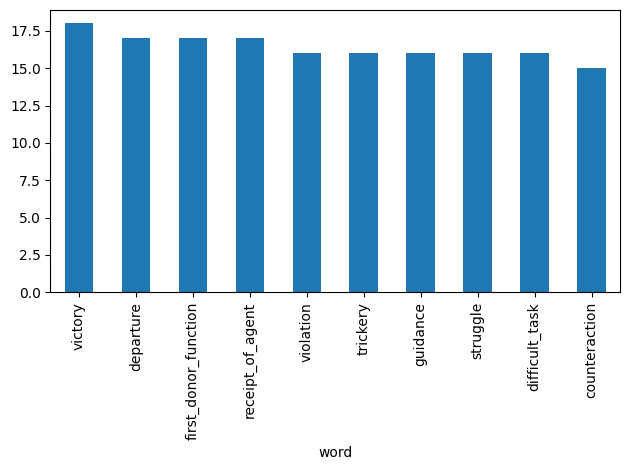

In [ ]:
%matplotlib inline
axes = df.plot.bar(x='word', y='count', legend=False)
import matplotlib.pyplot as plt
plt.gcf().tight_layout()

5. Creating a dictionary cloud (listing)

In [ ]:
from pathlib import Path
text = Path('/content/gdrive/My Drive/Propp/Proppfunc.txt').read_text()
import imageio

In [ ]:
# mask for creating a cloud
mask_image = imageio.imread('/content/gdrive/My Drive/Propp/mask.jpeg')

from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=1000, colormap='prism', mask=mask_image, stopwords=stop_words, max_words= 10, background_color='white')
wordcloud = wordcloud.generate(text)
wordcloud = wordcloud.to_file('/content/gdrive/My Drive/Propp/mask_2.jpeg')


<ipython-input-89-42c98c4477b1>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_image = imageio.imread('/content/gdrive/My Drive/Propp/mask.jpeg')
